# Neural Networks 

Using a linear equation, step function, bias unit

Refreshes some of the content from term 1 in Perceptrons.

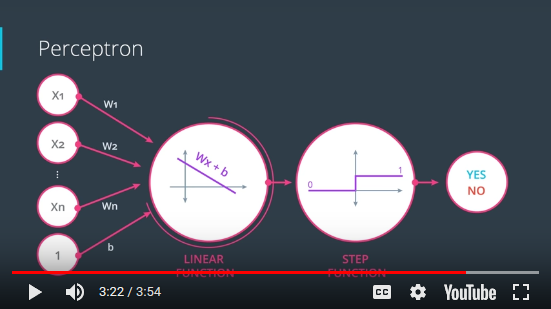


## Trick: Make a Line Move Closer to a Point

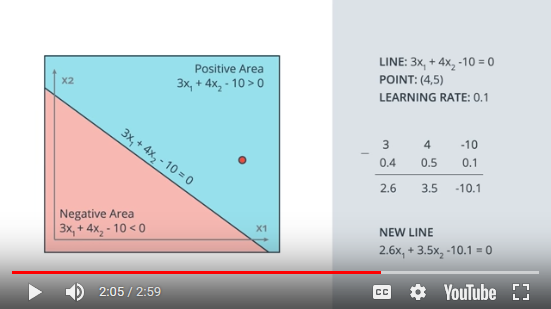

Modify the eq of the line using the coords of the point, plus bias unit

3x1 + 4x2 - 10 = 0, point (4,5)

3 4 -10
subtract 4 5 1
= -1 -1 -11

new line moved too much

so add a learning rate, and compare again

3 4 -10
subtract 4*0.1 5*0.1 1*0.1
= 2.6 3.5 -10.1

subtract if line is below the point
add if the line is above the point



In [1]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(40)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        W[0] += (y[i]-y_hat) * X[i][0]*learn_rate
        W[1] += (y[i]-y_hat) * X[i][1]*learn_rate
        b += (y[i]-y_hat) * learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


## Error Functions

Mount Errorest...

Error function must be continuous (cannot be discrete, since it is not differentiable) and differentiable

Error is the height of the mountain. Goal is to get to the bottom of the mountain

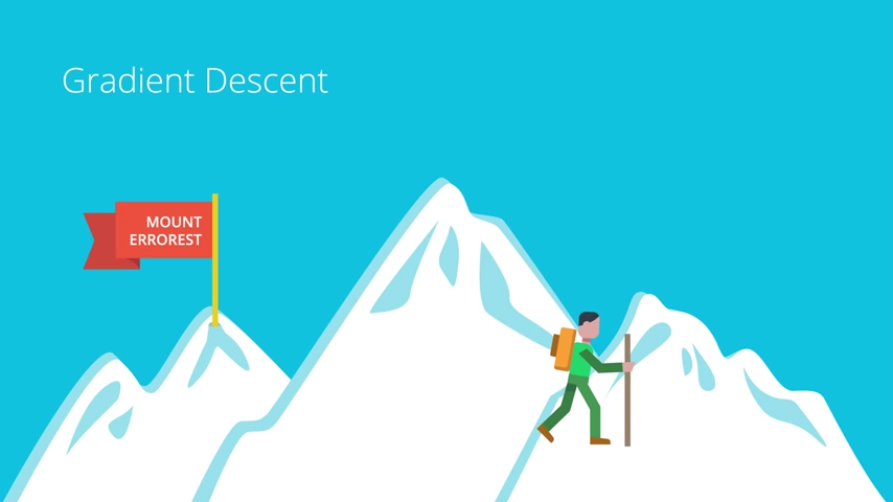

## Discrete vs. Continuous

Moving from discrete predictions to continuous predictions.

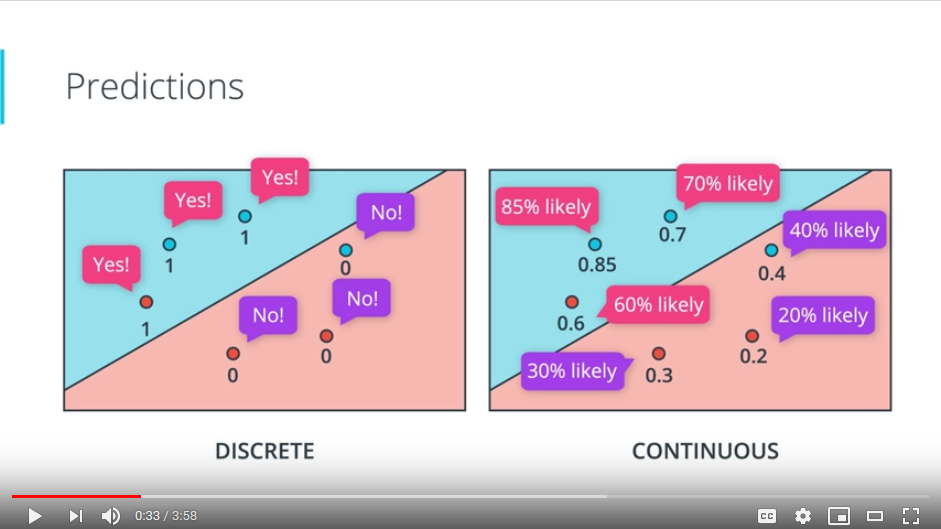

Change from a step function on the left, to the sigmoid function on the 
right.

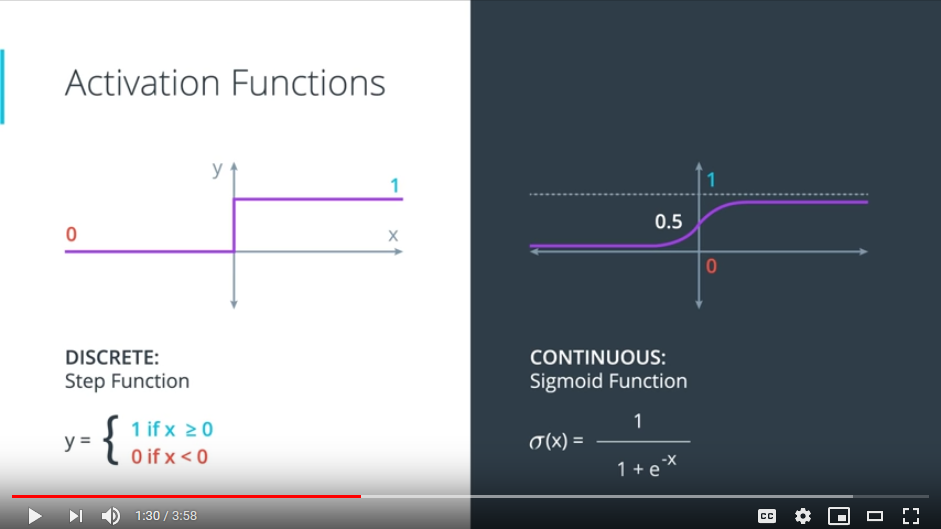

Allows probability from 0.0 to 1.0, instead of simply 0 and 1 of a step function. Now we have a probability space.

Combine Wx + b to the sigmoid function.

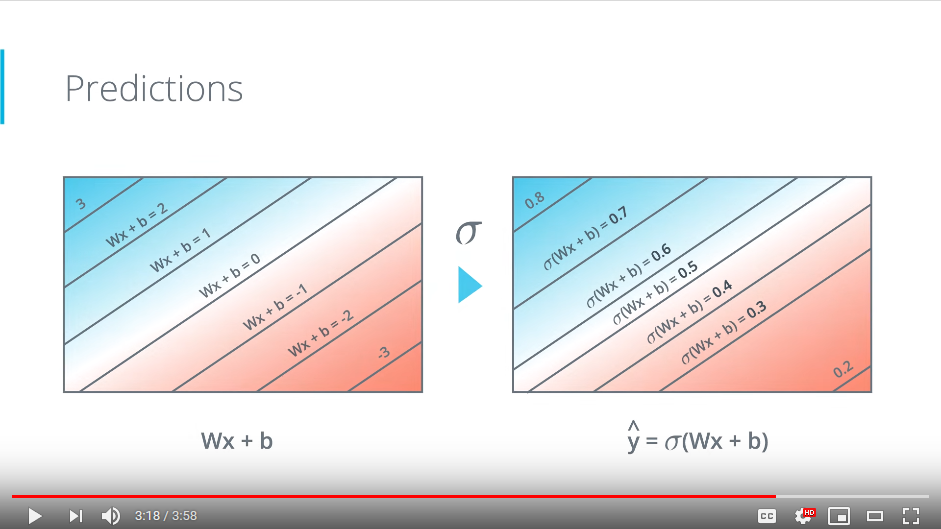


## Quiz Question

The sigmoid function is defined as sigmoid(x) = 1/(1+e-x). 

If the score is defined by 4x1 + 5x2 - 9 = score, then which of the following points has exactly a 50% probability of being blue or red? (Choose all that are correct.)



In [2]:
import numpy as np

x1 = 1
x2 = 1
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

x1 = 2
x2 = 4
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

x1 = 5
x2 = -5
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

x1 = -4
x2 = 5
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

sigmoid_x:  0.5
sigmoid_x:  0.9999999943972036
sigmoid_x:  8.315280276641321e-07
sigmoid_x:  0.5


## Softmax

Sigmoid function for 3 or more classes.

https://en.wikipedia.org/wiki/Softmax_function

"In mathematics, the softmax function, also known as softargmax[1] or normalized exponential function,[2]:198 is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval ( 0 , 1 ) {\displaystyle (0,1)} (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes"



### Question 1 of 2

What function turns every number into a positive number?

ANSWER: Expodential


In [3]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    expL = np.exp(L) # get exp for each value in array
    sumExpL = sum(expL) # sum exp result of each
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL) # normalize
    return result


## One-Hot Encoding

Cannot use 0 and 1 for multiple classes.

Use 1 variable for each of the classes.

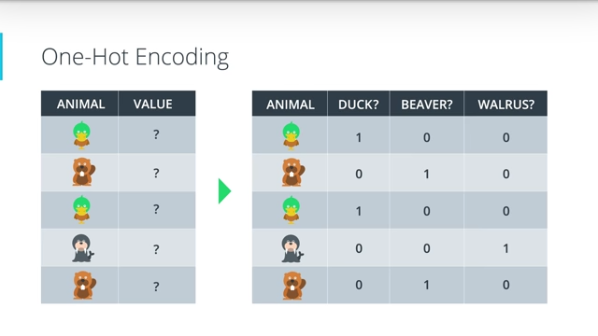

## Maximum Likelihood

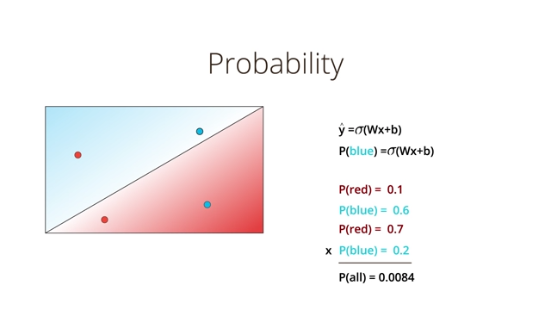

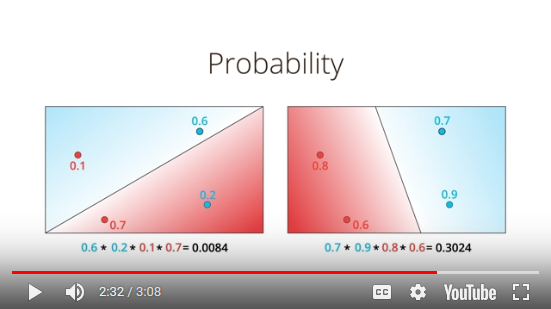

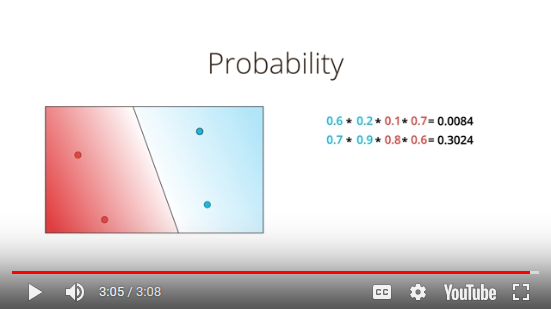
